# Coursework 2 - Part 2


In [1]:
################ Coursework 2 #######################
###################Part 2###################################

###### Import the packages ###############
import numpy as np;
import pandas as pd;
import os;
import datetime as dt;
import matplotlib.pyplot as plt


### 2.1: Reading in the datasets (2 marks)
Read columns "country, date, cases" from file "confirmed\_cases\_by\_country.csv" into a dataframe called "cases\_by\_country".
Read columns "is\_china, date, cases" from "confirmed\_cases\_china\_vs\_world.csv" into a dataframe called "cases\_all". Rename the column "is\_china" to "country" (hint you may use .rename()). Then split this dataframe into two new ones: cases in China ("cases\_china") and cases elsewhere ("cases\_not\_china"). 

In [2]:
###########Read the csv files into a data frame######################


##############Setting the Current Directory run the file ##################
curr_dir=os.getcwd();
confirmed_cases_by_country=curr_dir+'\\confirmed_cases_by_country.csv';
confirmed_cases_china_vs_world= curr_dir+'\\confirmed_cases_china_vs_world.csv';



### Reading onle specific coulms into the dataframe
field_cases_country=['country','date','cases'];
fields_all = ['is_china','date','cases'];


cases_by_country = pd.read_csv(confirmed_cases_by_country,header=0,usecols=field_cases_country);
cases_all = pd.read_csv(confirmed_cases_china_vs_world,header=0,usecols=fields_all);

In [3]:
#Re-naming the column 'is_china' in 'cases_all' dataframe to a new column 'country'
cases_all=cases_all.rename(columns={"is_china":"country"}); ## column re-named

In [4]:
#Before we do furhter validation of the data we need to do some pre-checks to understand, that if the data needs any cleansing
# Initial validation of the dataframes before we split it
cases_all.isnull().sum()

country    0
date       0
cases      0
dtype: int64

In [5]:
cases_all.count()
# country    112
# date       112
# cases      112
# dtype: int64
    
cases_all.nunique()
# country     2
# date       56
# cases      99
# dtype: int64

# There are no null values in the cases_all data frame and there are total of 112 values split between China (56) and Non-china (56)
# Initial Validation completed



country     2
date       56
cases      99
dtype: int64

In [6]:
#Splitting the cases_all into dataframes cases_china and cases_not_china, based on the values in the data frame :
 # 1. We get the list of unique values in the countries dataframe
#  2.We iterate over the uniue number of countries
# 3. Then we dynamically create and load the dataframe per country
#   In this case its China and no China

# Getting the unique values of the cases_all country into an array
country_names =cases_all['country'].unique()

group_by_country = cases_all.groupby(cases_all.country)

for i in range(len(country_names)):
    dfname = 'cases_'+(country_names[i].lower().replace(" ","_"))
    vars()[dfname] = group_by_country.get_group(country_names[i]).copy()

# country    56
# date       56
# cases      56
# dtype: int64

In [7]:
cases_china.count()
#country    56
#date       56
#cases      56
#dtype: int64

cases_china.head

<bound method NDFrame.head of    country        date  cases
0    China  2020-01-22    548
1    China  2020-01-23     95
2    China  2020-01-24    277
3    China  2020-01-25    486
4    China  2020-01-26    669
5    China  2020-01-27    802
6    China  2020-01-28   2632
7    China  2020-01-29    578
8    China  2020-01-30   2054
9    China  2020-01-31   1661
10   China  2020-02-01   2089
11   China  2020-02-02   4739
12   China  2020-02-03   3086
13   China  2020-02-04   3991
14   China  2020-02-05   3733
15   China  2020-02-06   3147
16   China  2020-02-07   3523
17   China  2020-02-08   2704
18   China  2020-02-09   3015
19   China  2020-02-10   2525
20   China  2020-02-11   2032
21   China  2020-02-12    373
22   China  2020-02-13  15136
23   China  2020-02-14   6463
24   China  2020-02-15   2055
25   China  2020-02-16   2100
26   China  2020-02-17   1921
27   China  2020-02-18   1777
28   China  2020-02-19    408
29   China  2020-02-20    458
30   China  2020-02-21    473
31   China

In [8]:
cases_not_china.count()
#country    56
#date       56
#cases      56
#dtype: int64

cases_not_china.head

<bound method NDFrame.head of        country        date  cases
56   Not China  2020-01-22      7
57   Not China  2020-01-23      3
58   Not China  2020-01-24     11
59   Not China  2020-01-25      7
60   Not China  2020-01-26     15
61   Not China  2020-01-27      7
62   Not China  2020-01-28     19
63   Not China  2020-01-29     10
64   Not China  2020-01-30     14
65   Not China  2020-01-31     32
66   Not China  2020-02-01     22
67   Not China  2020-02-02     10
68   Not China  2020-02-03      8
69   Not China  2020-02-04     20
70   Not China  2020-02-05     10
71   Not China  2020-02-06     35
72   Not China  2020-02-07     51
73   Not China  2020-02-08     25
74   Not China  2020-02-09     15
75   Not China  2020-02-10     87
76   Not China  2020-02-11      8
77   Not China  2020-02-12     46
78   Not China  2020-02-13     11
79   Not China  2020-02-14     54
80   Not China  2020-02-15     90
81   Not China  2020-02-16     94
82   Not China  2020-02-17    113
83   Not China  20

In [9]:
# All the values from cases_all are equally split between the two dataframes
# Task 1 is complete


### 2.2: Summarising the total number of confirmed cases by country (3 marks)
Obtain the January records for "cases\_by\_country" and "cases\_china" and summarise cases in China against cases in other countries in a dataframe for this month. Repeat this procedure for February and March. 
Create a bar plot to compare cases in China with cases in the 5 countries with most cases outside China for January, February and March. 


In [10]:
################ Task2  ###########################
#We are analysing the Covid cases in China vs. Other countries of the world

# Main idea is group by the columns of the table by month year and plot the 2020-Jan , 2020- Feb , 2020-March
#Step 1 : Create a Month_year column in both cases_by_country and cases_china
# Step 2: Create a function to dynamically filter and return the data frame values
# Step 3: Create a data frame by combining the individual data frames
# Step 4: Use it plot a graph


cases_by_country['month_year']=pd.to_datetime(cases_by_country['date']).dt.to_period('M')
cases_china['month_year']=pd.to_datetime(cases_china['date']).dt.to_period('M')

In [13]:
# creating a function to get the top values
def top(df, n=5, month_fil='month_year',column='cases'):
    group_country= df[df['month_year']==month_fil].groupby('country').sum()
    group_country['month_year']=month_fil
    return group_country.nlargest(n, column, keep='first').reset_index()

# We are using the function above to get the top n COVID country values from the dataframe for each month 
# Then we concat to create a chart data frame

chart_top_values_month = pd.concat([top(cases_by_country,n=5,month_fil='2020-01'),top(cases_by_country,n=5,month_fil='2020-02'),top(cases_by_country,n=5,month_fil='2020-03'),
top(cases_china,n=5,month_fil='2020-01'),top(cases_china,n=5,month_fil='2020-02'),top(cases_china,n=5,month_fil='2020-03')],ignore_index=True)

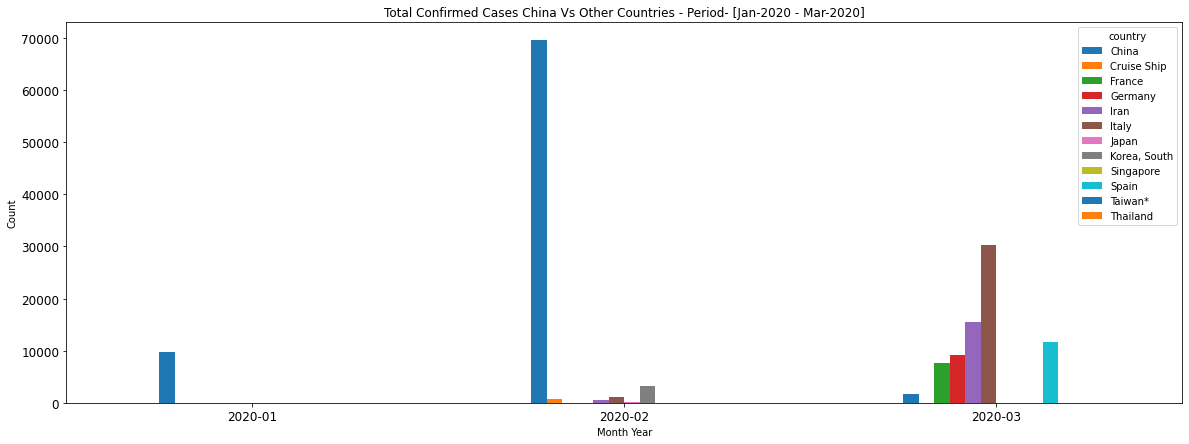

In [15]:
chart_final_top_values= chart_top_values_month.pivot(index='month_year', columns='country', values='cases')

axes=chart_final_top_values.plot.bar(figsize=(20,7),title='Total Confirmed Cases China Vs Other Countries - Period- [Jan-2020 - Mar-2020]',fontsize=12,legend=True)

plt.xlabel("Month Year")
plt.ylabel("Count")
plt.xticks(rotation=0)
   
plt.show()

In [16]:
# From the above graph we can see that the number of cases in China was very high for January and February when compared to other countries

### 2.3: Plotting the accumulated cases by date (2 marks)

Add a new column called "acc\_cases" in both  "cases\_not\_china" and "cases\_china" dataframes, which contains the accumulated number of cases by date. Create a time series plot for "acc\_cases" column in "cases\_not\_china" dataframe.

In [17]:
### 2.c Implemeting the Time Series Plot for the accumulated cases by date
# Here we are calculating the Cumulative density function and then plotting for cases outside China

cases_not_china['acc_cases']= cases_not_china.sort_values(['country','date']).groupby('country').cumsum()

In [18]:
cases_china['acc_cases']= cases_china.sort_values(['country','date']).groupby('country').cumsum()

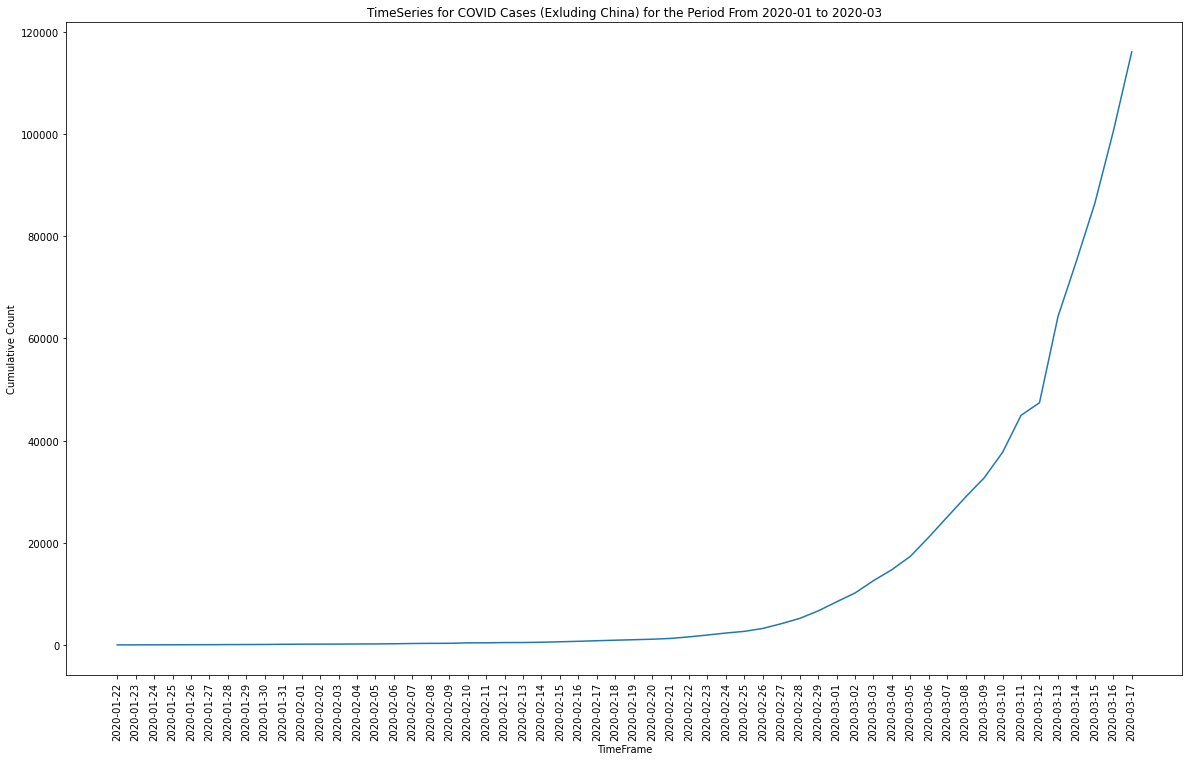

In [19]:
plt.figure(figsize=(20,12));

x = cases_not_china['date']
y = cases_not_china['acc_cases']
plt.xticks(rotation=90)
plt.ylabel('Cumulative Count')
plt.xlabel('TimeFrame')
plt.title('TimeSeries for COVID Cases (Exluding China) for the Period From 2020-01 to 2020-03')
plt.plot(x,y)
plt.show()

In [20]:
# From the above graph, we can clearly see that the number of cases in China had exponentially increased from end of February itself.

### 2.4: Analysing across countries (3 marks)
When the number of COVID-19 cases became higher than 10,000 in China, what was the number of cases for all other counties in that day? Print the 5 countries with highest number of cases. 


During the first 5 days that the daily cases in China dropped below 100, what is average number of cases for other countries? Report the top 5 countries with average number of cases.

In [21]:
#Section 2.4 Analysis across countries
# In this section we are going to analyse how the cases in rest of world was when compared to China on specific period.

#1. Cases all over the world when cases in China spiked like around 10000 cases per day.
# and plotting the top 5 countries
ch_gr=cases_china[cases_china['cases']>10000].sort_values(['date'],ascending=False).head(1)['date']
ch_gr= ch_gr.to_numpy()


In [22]:
#Cases of Top 5 countries by count of cases - conditional on the date where cases in China was greater than 10000
# The reason why there are more than 5 records is because the last value is 0 and so we should include the countries which 
#reported 0 cases. So we created rank column and filtered on the first 5 ranks.

cases_other_countries_sp_date= pd.concat([cases_by_country[cases_by_country['date']==ch_gr[0]].sort_values(['cases'],ascending=False).head(5),
cases_by_country[(cases_by_country['date']==ch_gr[0]) &(cases_by_country['cases']==0)].sort_values(['cases'],ascending=False)])

cases_other_countries_sp_date['rank_name']=cases_other_countries_sp_date['cases'].rank(ascending=False)

cases_other_countries_sp_date[cases_other_countries_sp_date['rank_name']<=5]


,country,date,cases,month_year,rank_name
5331,Singapore,2020-02-13,8,2020-02,1.0
5356,Vietnam,2020-02-13,1,2020-02,3.0
5294,Malaysia,2020-02-13,1,2020-02,3.0
5364,US,2020-02-13,1,2020-02,3.0


In [23]:
#Based on the above obeservation we can see that there were only 4 countries which has cases reported on that day.

In [24]:
#Next we are going to check the cases all over the world when the cases in China was less than 100

In [25]:
ch_le =cases_china[cases_china['cases']<100].sort_values(['date']).head(5)['date']
ch_le = ch_le.to_numpy()

In [26]:
cases_by_country[cases_by_country['date'].isin(ch_le)].groupby('country').mean().sort_values(['cases'],ascending=False).head(5)

,cases
country,
Italy,925.8
Iran,485.8
"Korea, South",210.8
Spain,134.6
Germany,101.2


In [ ]:
# Here we can see when the cases in China became less towards the end the cases spiked all over the world

In [ ]:
#################This concluded the end of the Analysis for 2 ###################